In [22]:
import matplotlib.pyplot as plt
import glob
import math
from tkinter import Tcl
import numpy as np

In [23]:
# file path
path1 = "G:\\My Drive\\Tomography\\Shared Hasil\\Sulawesi\\hasil\\dwsvs\\070623-damp100-real"
files = glob.glob(path1+"\\*.png")
files = Tcl().call('lsort', '-dict', files)
files = [plt.imread(x) for x in files]
print(f"reading {len(files)} file(s)")

#cropping files
files1 = [i[:4350,:] for i in files]

#hilangkan layer 
# files1 = files1[:-3]
print(f"reading {len(files1)} file(s) after selection")

# colorbar selecting data
color_bar = files[0][4350::]

#make white image
whites1 = np.zeros([files1[0].shape[0],files1[0].shape[1],files1[0].shape[2]],dtype=np.uint8)
whites1.fill(255)

#make white image based on colorbar
whites2 = np.zeros([color_bar.shape[0],color_bar.shape[1],color_bar.shape[2]],dtype=np.uint8)
whites2.fill(255)

reading 15 file(s)
reading 15 file(s) after selection


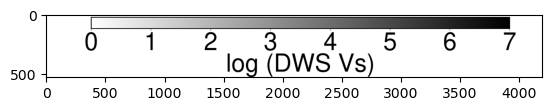

In [24]:
plt.imshow(color_bar)

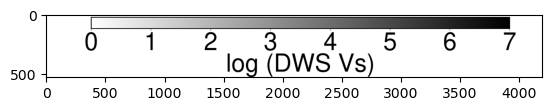

In [25]:
#cropping colorbar
colorbar_crop = 0
plt.imshow(color_bar[:,colorbar_crop:])

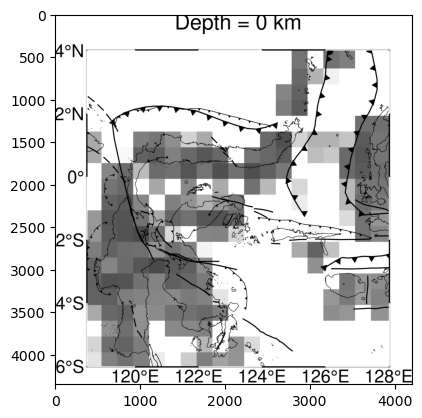

In [26]:
plt.imshow(files1[0])

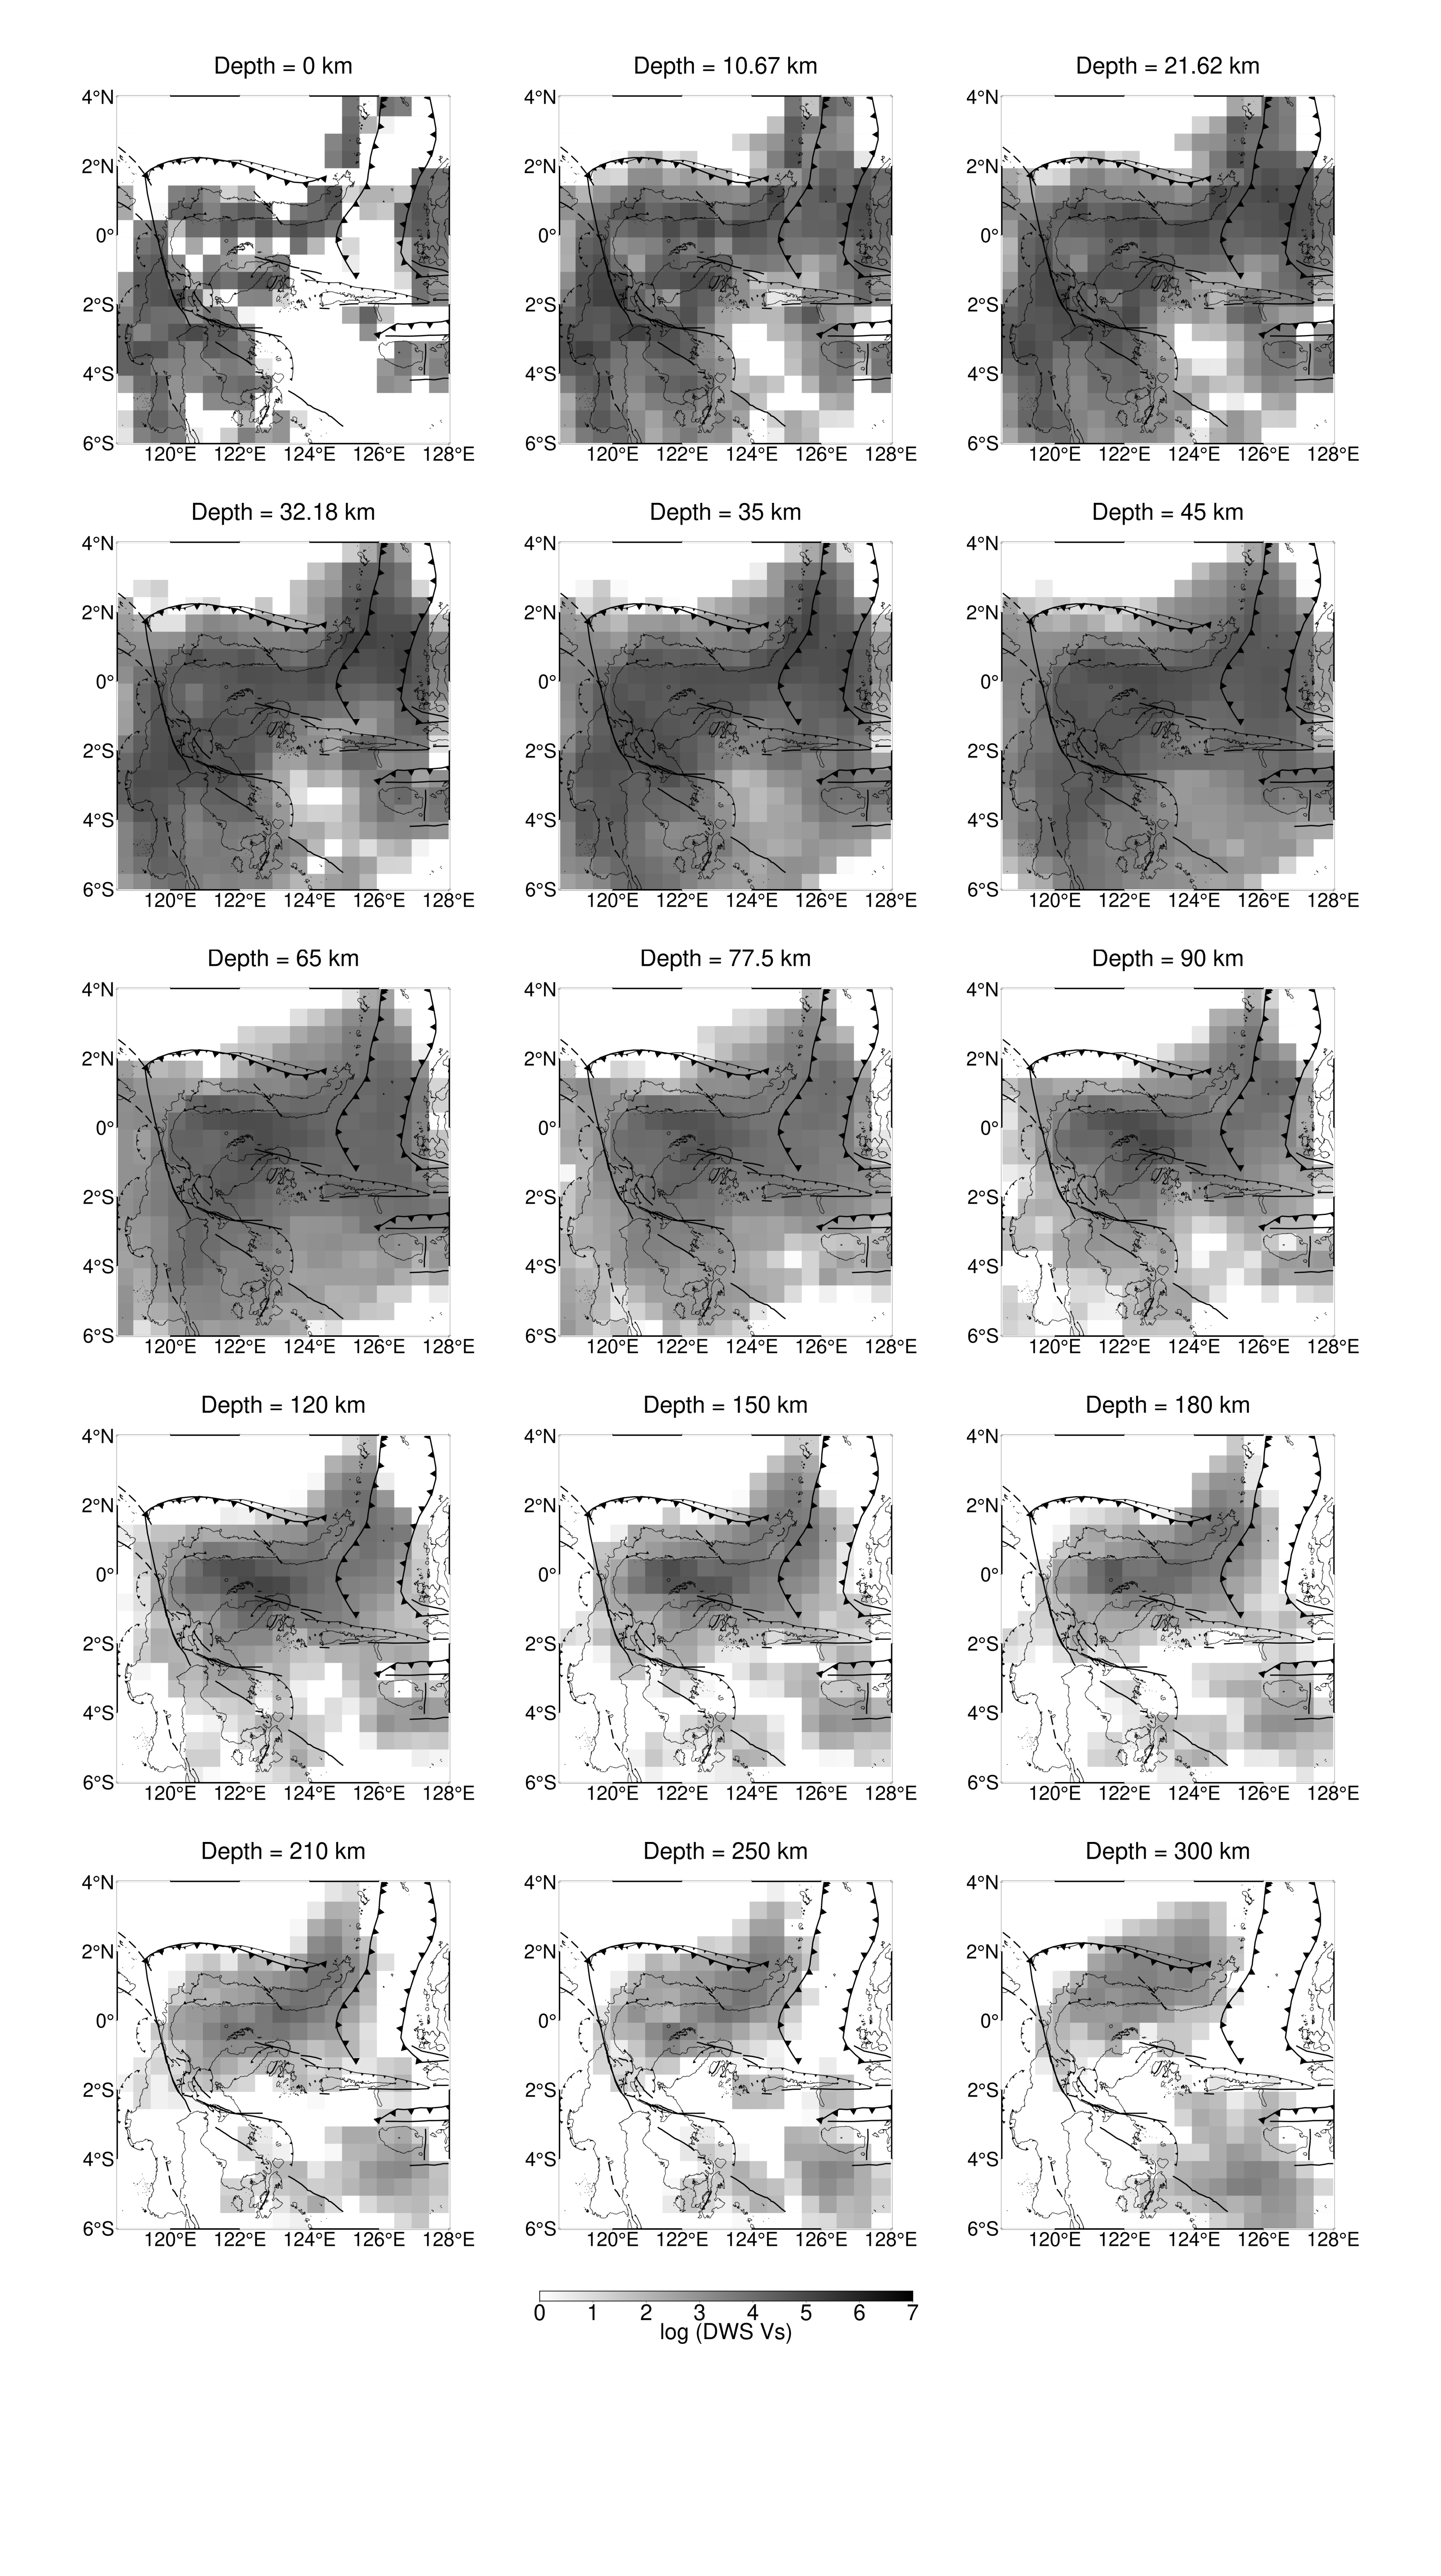

In [27]:
#initiate figure
ncols = 3
nrows = math.ceil(len(files1)/ncols)
if nrows*ncols == len(files1):
    fig, ax = plt.subplots(figsize=(3,6), nrows=nrows+1, ncols=ncols, dpi=1200) #figsize= (w,h) in inches
    anchor = "N"
    color_bar = color_bar[:,colorbar_crop:]
else:
    fig, ax = plt.subplots(figsize=(3,6), nrows=nrows, ncols=ncols, dpi=1200) #figsize= (w,h) in inches
    anchor = "C"
fig.subplots_adjust(hspace=0.1, wspace=0)
color_bar_is=True
# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    axi.set_axis_off()
    if i < len(files1):
        try:
            img = files1[i]
            axi.imshow(img, aspect='equal')
        except:
            whitess = whites1
            axi.imshow(whitess, aspect='equal')
            pass
    else:
        if color_bar_is:
            if (i % ncols == 0):
                whitess = whites2
                axi.imshow(whitess, aspect='equal')
            else:
                img = color_bar
                axi.set_anchor(anchor)
                axi.imshow(img)
                color_bar_is=False
        else:
            whitess = whites2
            axi.imshow(whitess, aspect='equal')
    

plt.show()

In [28]:
# save figure
fig.savefig(path1+"\\gabungan.jpg", dpi=1200, bbox_inches='tight')